In [25]:
import numpy as np
from scipy.stats import gamma, norm
from scipy.stats import beta
import matplotlib.pyplot as plt

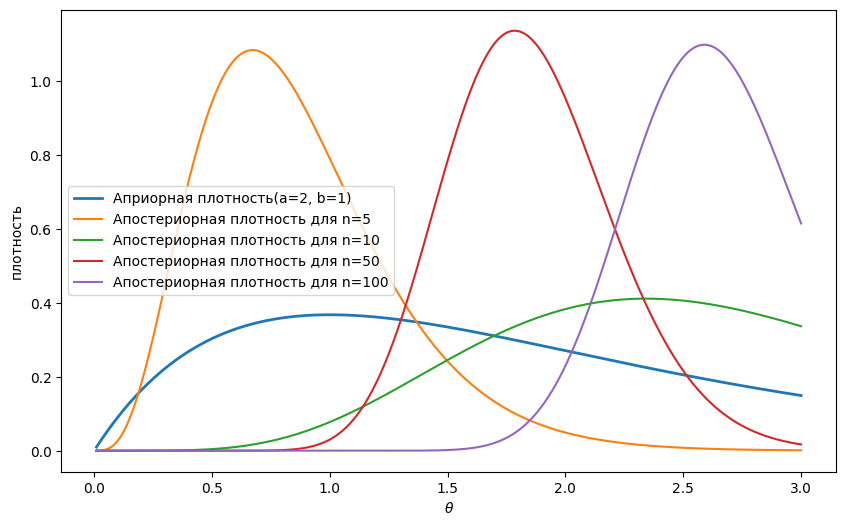

In [7]:
#2.1
a = 2
b = 1

def posterior_params(data, a, b):
    a_post = a + len(data) / 2
    b_post = b + np.sum(data**2) / 2
    return a_post, b_post

theta_range = np.linspace(0.01, 3, 1000)

prior_density = gamma.pdf(theta_range, a, scale=1/b)

plt.figure(figsize=(10, 6))
plt.plot(theta_range, prior_density, label='Априорная плотность(a={}, b={})'.format(a, b), linewidth=2)

n_values = [5, 10, 50, 100]
for n in n_values:
    theta_true = gamma.rvs(a, scale=1/b)
    data = norm.rvs(scale=np.sqrt(1/theta_true), size=n)
    a_post, b_post = posterior_params(data, a, b)
    post_density = gamma.pdf(theta_range, a_post, scale=1/b_post)
    plt.plot(theta_range, post_density, label=f'Апостериорная плотность для n={n}')

plt.xlabel('$\\theta$')
plt.ylabel('плотность')
plt.legend()
plt.show()

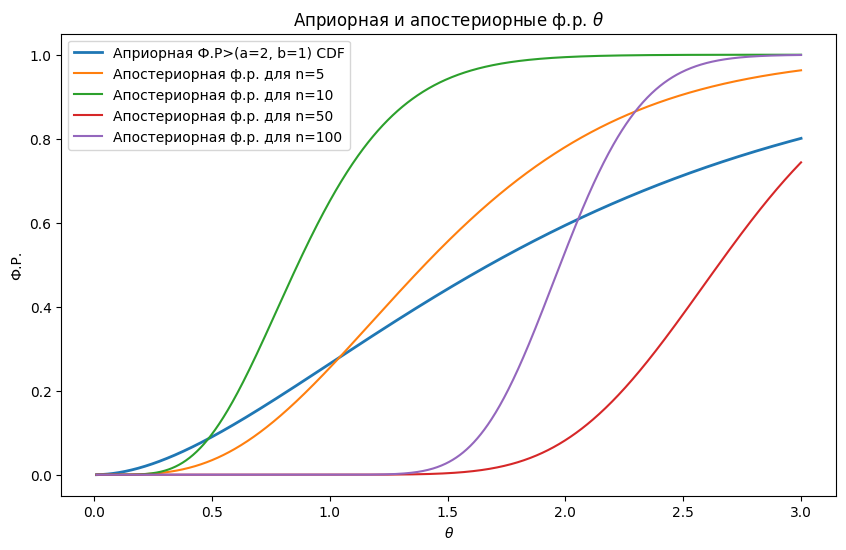

In [12]:
#2.2
prior_cdf = gamma.cdf(theta_range, a, scale=1/b)

plt.figure(figsize=(10, 6))
plt.plot(theta_range, prior_cdf, label='Априорная Ф.Р>(a={}, b={}) CDF'.format(a, b), linewidth=2)

for n in n_values:
    theta_true = gamma.rvs(a, scale=1/b)
    data = norm.rvs(scale=np.sqrt(1/theta_true), size=n)
    a_post, b_post = posterior_params(data, a, b)
    post_cdf = gamma.cdf(theta_range, a_post, scale=1/b_post)
    plt.plot(theta_range, post_cdf, label=f'Апостериорная ф.р. для n={n}')

plt.title('Априорная и апостериорные ф.р. $\\theta$')
plt.xlabel('$\\theta$')
plt.ylabel('Ф.Р.')
plt.legend()
plt.show()


Размерность Theta range: (100,)
Размерность Theta1 для абсолютного риска: (100,)
Размерность Theta1 для квадратичного риска: (100,)
Размерность Theta range: (100,)
Размерность Theta1 для абсолютного риска: (100,)
Размерность Theta1 для квадратичного риска: (100,)
Размерность Theta range: (100,)
Размерность Theta1 для абсолютного риска: (100,)
Размерность Theta1 для квадратичного риска: (100,)
Размерность Theta range: (100,)
Размерность Theta1 для абсолютного риска: (100,)
Размерность Theta1 для квадратичного риска: (100,)
Размерность Theta range: (100,)
Размерность Theta1 для абсолютного риска: (100,)
Размерность Theta1 для квадратичного риска: (100,)
Размерность Theta range: (100,)
Размерность Theta1 для абсолютного риска: (100,)
Размерность Theta1 для квадратичного риска: (100,)
Размерность Theta range: (100,)
Размерность Theta1 для абсолютного риска: (100,)
Размерность Theta1 для квадратичного риска: (100,)
Размерность Theta range: (100,)
Размерность Theta1 для абсолютного риска: (1

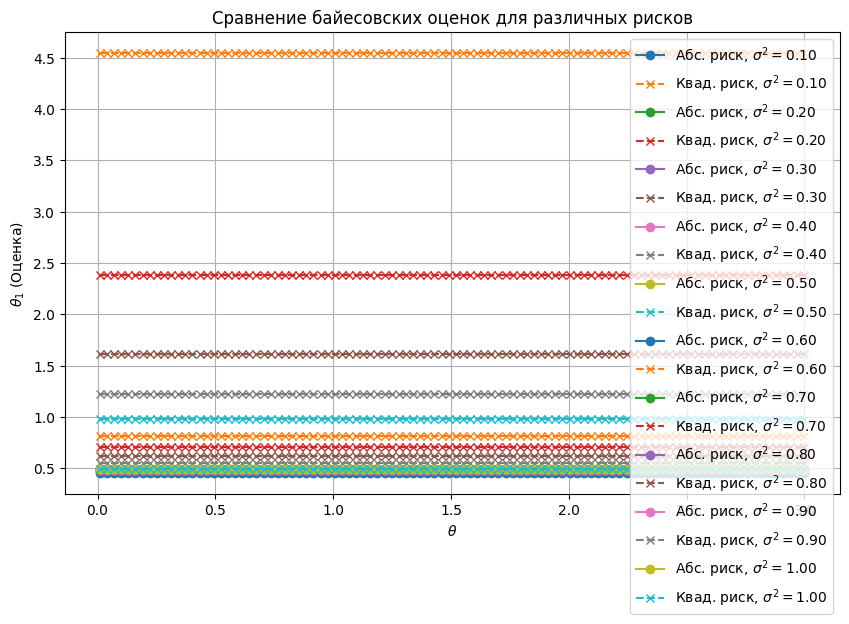

In [58]:
#2.3
n = 100
mean_X = 0.5
theta_range = np.linspace(0.01, 3, 100)
sigma2_values = np.linspace(0.1, 1, 10)

def absolute_bayesian_estimate(theta_range, sigma2, n, mean_X):
    return n / (n + 1 / sigma2) * mean_X * np.ones_like(theta_range)

def quadratic_bayesian_estimate(theta_range, sigma2, n, mean_X):
    return n * mean_X / (1 + sigma2 * n) * np.ones_like(theta_range)

plt.figure(figsize=(10, 6))

for sigma2 in sigma2_values:
    theta1_absolute = absolute_bayesian_estimate(theta_range, sigma2, n, mean_X)
    theta1_quadratic = quadratic_bayesian_estimate(theta_range, sigma2, n, mean_X)

    print("Размерность Theta range:", theta_range.shape)
    print("Размерность Theta1 для абсолютного риска:", theta1_absolute.shape)
    print("Размерность Theta1 для квадратичного риска:", theta1_quadratic.shape)

    plt.plot(theta_range, theta1_absolute, 'o-', label=f'Абс. риск, $\sigma^2={sigma2:.2f}$')
    plt.plot(theta_range, theta1_quadratic, 'x--', label=f'Квад. риск, $\sigma^2={sigma2:.2f}$')

plt.title('Сравнение байесовских оценок для различных рисков')
plt.xlabel('$\\theta$')
plt.ylabel('$\\theta_1$ (Оценка)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

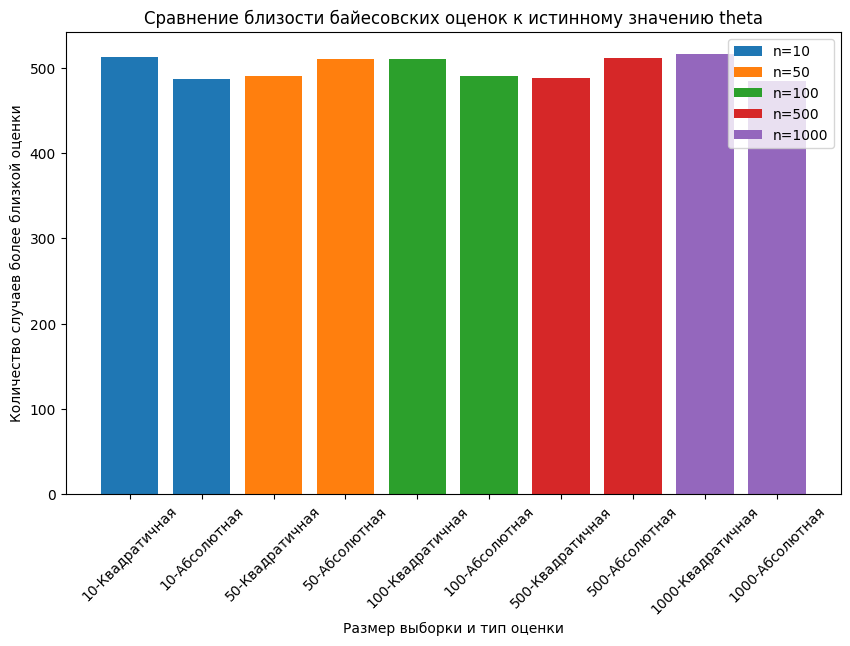

In [24]:
#2.4
def simulate_estimates(n, num_simulations=1000):
    theta_closer_counts = {'Квадратичная': 0, 'Абсолютная': 0}

    for _ in range(num_simulations):
        theta = gamma.rvs(a, scale=1/b)
        data = norm.rvs(scale=np.sqrt(1/theta), size=n)
        mean_X = np.mean(data)
        sigma2 = np.var(data)

        theta1_quadratic = n * mean_X / (1 + sigma2 * n)
        theta1_absolute = n / (n + 1 / sigma2) * mean_X

        error_quadratic = np.abs(theta1_quadratic - theta)
        error_absolute = np.abs(theta1_absolute - theta)

        if error_quadratic < error_absolute:
            theta_closer_counts['Квадратичная'] += 1
        else:
            theta_closer_counts['Абсолютная'] += 1

    return theta_closer_counts

n_values = [10, 50, 100, 500, 1000]
results = {n: simulate_estimates(n) for n in n_values}

plt.figure(figsize=(10, 6))
for n, res in results.items():
    labels = list(res.keys())
    counts = list(res.values())
    plt.bar([str(n) + '-' + l for l in labels], counts, label=f'n={n}')

plt.title('Сравнение близости байесовских оценок к истинному значению theta')
plt.xlabel('Размер выборки и тип оценки')
plt.ylabel('Количество случаев более близкой оценки')
plt.xticks(rotation=45)
plt.legend()
plt.show()

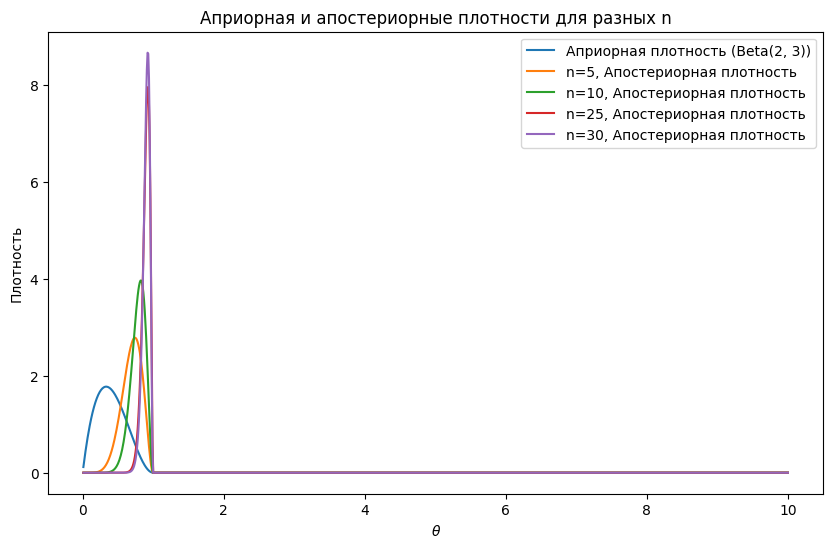

In [33]:
#3.1
a_prior = 2
b_prior = 3

def posterior_params(data, a_prior, b_prior):
    a_post = a_prior + len(data)
    b_post = b_prior + np.max(data)
    return a_post, b_post

theta_range = np.linspace(0.01, 10, 1000)

n_values = [5, 10, 25,30]
plt.figure(figsize=(10, 6))

prior_pdf = beta.pdf(theta_range, a_prior, b_prior)
plt.plot(theta_range, prior_pdf, label='Априорная плотность (Beta({}, {}))'.format(a_prior, b_prior))

for n in n_values:
    theta_true = np.random.beta(a_prior, b_prior)
    data = np.random.uniform(0, theta_true, n)

    a_post, b_post = posterior_params(data, a_prior, b_prior)

    post_pdf = beta.pdf(theta_range, a_post, b_post)
    plt.plot(theta_range, post_pdf, label='n={}, Апостериорная плотность'.format(n))

plt.title('Априорная и апостериорные плотности для разных n')
plt.xlabel('$\\theta$')
plt.ylabel('Плотность')
plt.legend()
plt.show()

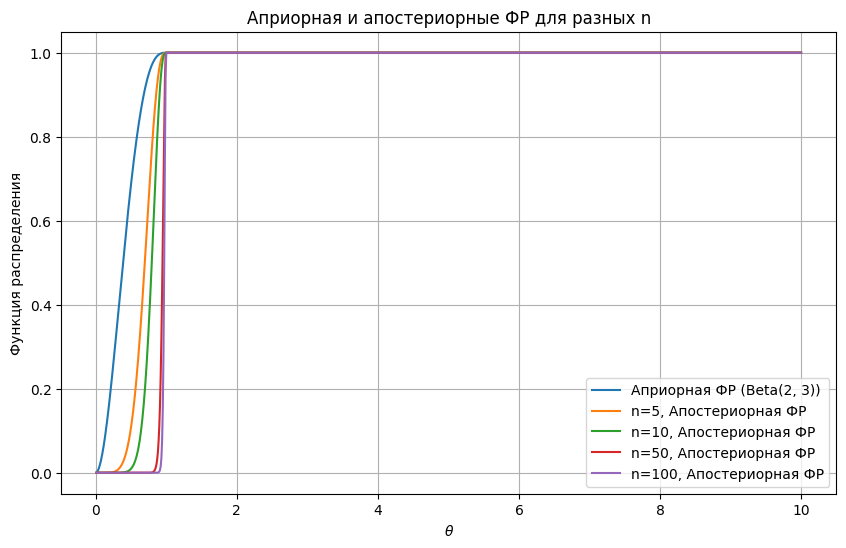

In [37]:
#3.2
theta_range = np.linspace(0.01, 10, 1000)

plt.figure(figsize=(10, 6))

prior_cdf = beta.cdf(theta_range, a_prior, b_prior)
plt.plot(theta_range, prior_cdf, label='Априорная ФР (Beta({}, {}))'.format(a_prior, b_prior))

for n in n_values:
    theta_true = np.random.beta(a_prior, b_prior)
    data = np.random.uniform(0, theta_true, n)

    a_post, b_post = posterior_params(data, a_prior, b_prior)

    post_cdf = beta.cdf(theta_range, a_post, b_post)
    plt.plot(theta_range, post_cdf, label='n={}, Апостериорная ФР'.format(n))

plt.title('Априорная и апостериорные ФР для разных n')
plt.xlabel('$\\theta$')
plt.ylabel('Функция распределения')
plt.legend()
plt.grid(True)
plt.show()

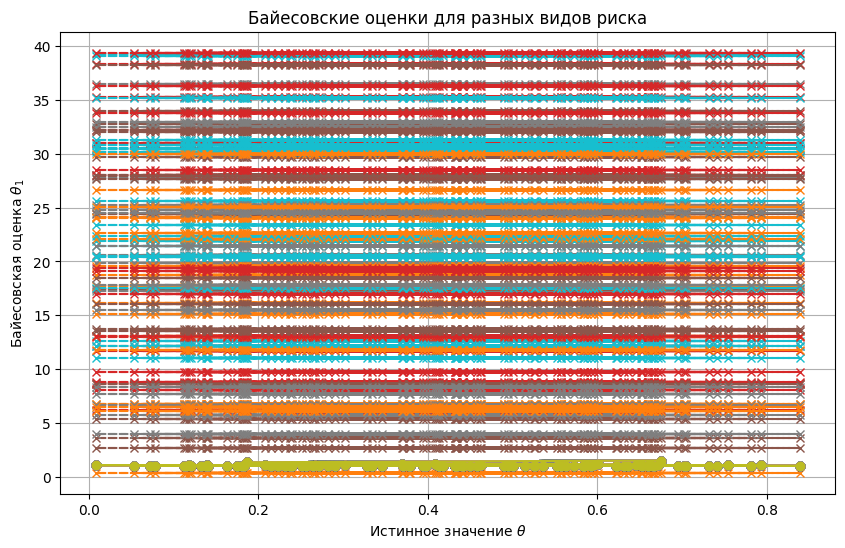

In [54]:
#3.3
a = 2
b = 3

theta_true = np.random.beta(a, b, size=100)
n_values = np.arange(1, 101)
X = np.random.uniform(0, theta_true[:, np.newaxis], (len(n_values), len(theta_true)))

theta1_absolute = (a + n_values) / (a + n_values - 1) * np.maximum(X, 1)

theta1_quadratic = (a + n_values) / (a + n_values + 1) * np.sum(X, axis=1)

plt.figure(figsize=(10, 6))
for i, n in enumerate(n_values):
    plt.plot(theta_true, theta1_absolute[i], 'o-', label=f'Абс. риск, $n={n}$')
    plt.plot(theta_true, np.full_like(theta_true, theta1_quadratic[i]), 'x--', label=f'Квад. риск, $n={n}$')

plt.xlabel('Истинное значение $\\theta$')
plt.ylabel('Байесовская оценка $\\theta_1$')
plt.title('Байесовские оценки для разных видов риска')
plt.grid(True)
plt.show()

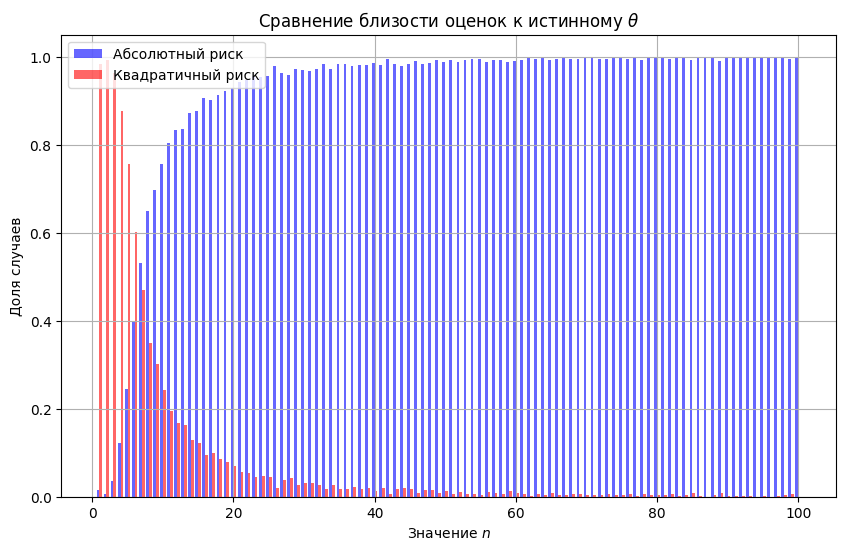

In [59]:
#3.4
a = 2
b = 3

num_simulations = 1000

n_values = np.arange(1, 101)

closer_absolute = np.zeros_like(n_values, dtype=float)
closer_quadratic = np.zeros_like(n_values, dtype=float)

for n in n_values:
    theta_true = np.random.beta(a, b, size=num_simulations)
    X = np.random.uniform(0, theta_true[:, np.newaxis], (num_simulations, n))

    theta1_absolute = (a + n) / (a + n - 1) * np.maximum(np.max(X, axis=1), 1)

    theta1_quadratic = (a + n) / (a + n + 1) * np.sum(X, axis=1)

    diff_absolute = np.abs(theta1_absolute - theta_true)
    diff_quadratic = np.abs(theta1_quadratic - theta_true)
    closer_absolute[n - 1] = np.mean(diff_absolute < diff_quadratic)
    closer_quadratic[n - 1] = np.mean(diff_quadratic < diff_absolute)

plt.figure(figsize=(10, 6))
plt.bar(n_values - 0.2, closer_absolute, width=0.4, label='Абсолютный риск', color='blue', alpha=0.6)
plt.bar(n_values + 0.2, closer_quadratic, width=0.4, label='Квадратичный риск', color='red', alpha=0.6)

plt.xlabel('Значение $n$')
plt.ylabel('Доля случаев')
plt.title('Сравнение близости оценок к истинному $\\theta$')
plt.legend()
plt.grid(True)
plt.show()